In [3]:
from gan_synthesis.datasets.dataset import VAEMaskDataset


dataset = VAEMaskDataset()

train_dataset, test_dataset = dataset.split()

In [4]:
len(train_dataset)

295

recon, mu, logvar = vae(input)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from mask_vae_models.encoder import Encoder
from mask_vae_models.decoder import Decoder
from mask_vae_models.vae import VAE, kl_divergence

# 🧠 Model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)
model = VAE(encoder, decoder).to(device)

criterion = nn.CrossEntropyLoss()  # or MSELoss, BCEWithLogitsLoss, etc.
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# 📦 Data loaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# 🏋️‍♂️ Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0

    for _, seg in train_loader:
        seg = seg.to(device)

        # Forward pass
        recon, mu, var = model(seg)
        kld_loss = kl_divergence(mu, var)
        ce_loss = nn.CrossEntropyLoss(recon, seg)
        loss = ce_loss + 5e-3 * kld_loss

        # Backward + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    print(f"[Epoch {epoch+1}] Train Loss: {avg_train_loss:.4f}")

    # 🧪 Validation
    model.eval()
    running_val_sloss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            running_val_loss += loss.item()
            if outputs.dim() > 1:
                predicted = outputs.argmax(dim=1)
                correct += (predicted == targets).sum().item()
                total += targets.size(0)

    avg_val_loss = running_val_loss / len(val_loader)
    print(f"[Epoch {epoch+1}] Val Loss: {avg_val_loss:.4f}", end='')

    if total > 0:
        acc = correct / total
        print(f", Val Acc: {acc:.4f}")
    else:
        print()

In [3]:
encoder = Encoder()
decoder = Decoder()
vae = VAE(encoder, decoder)

In [11]:
def parameter_count(model):
    return sum(param.numel() for param in model.parameters())

In [12]:
parameter_count(vae)

7427140

In [10]:
.8 * 369

295.2

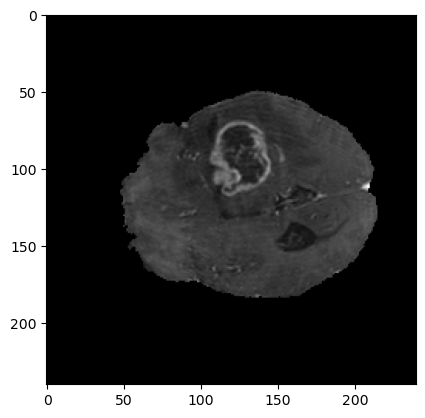

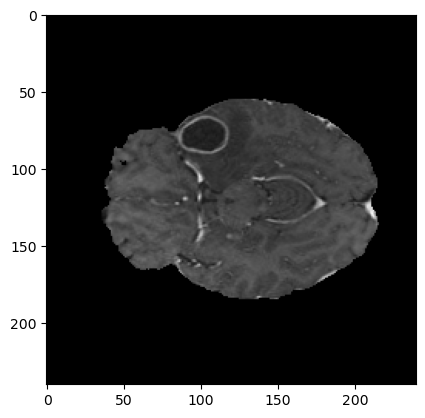

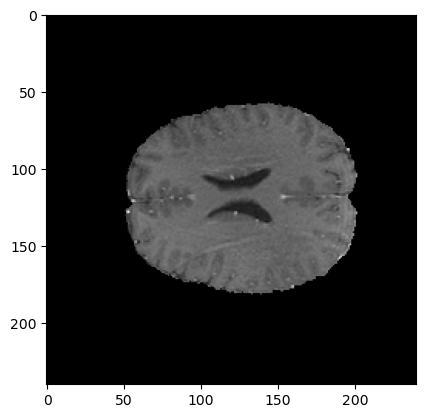

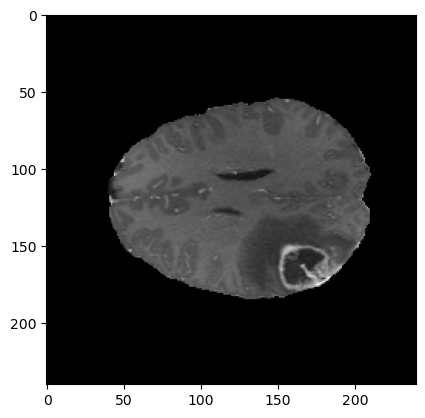

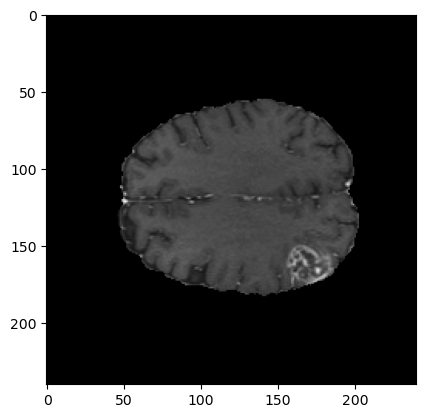

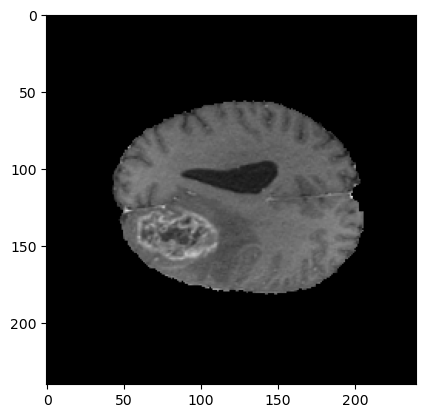

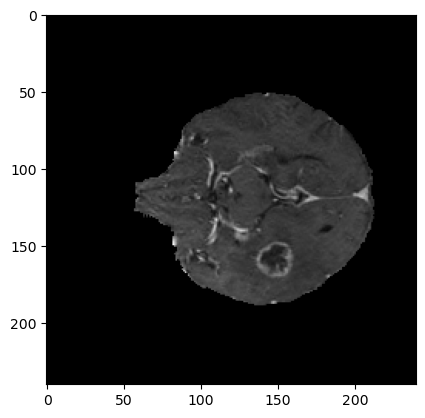

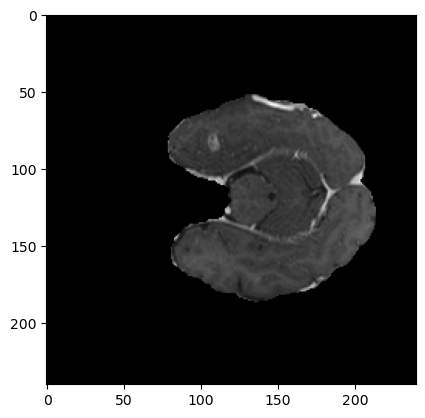

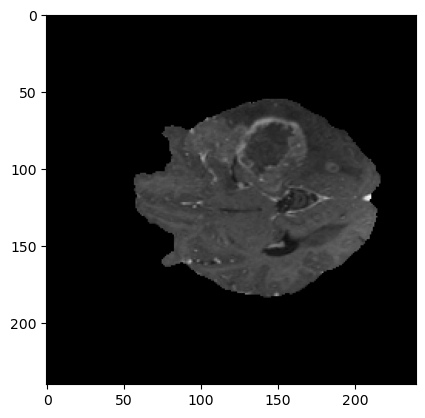

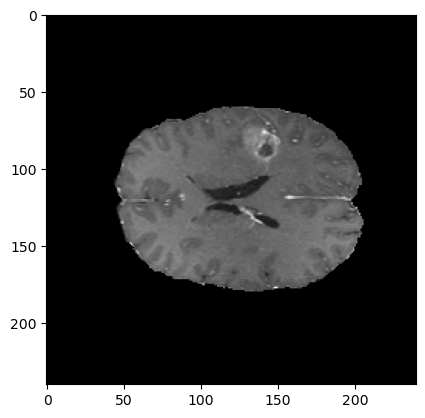

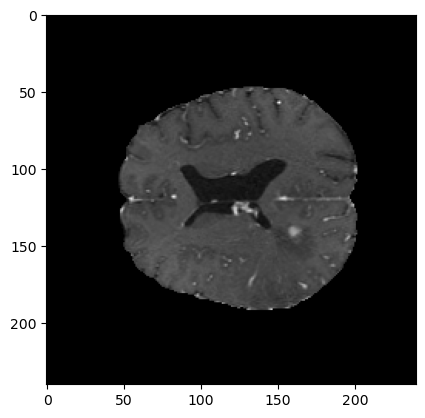

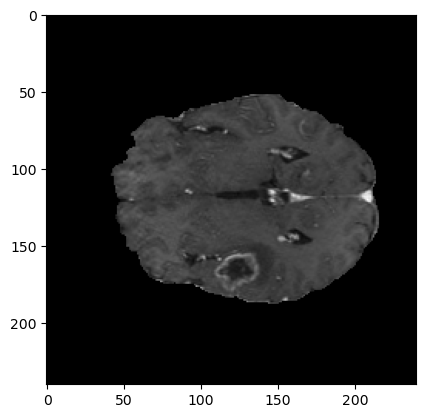

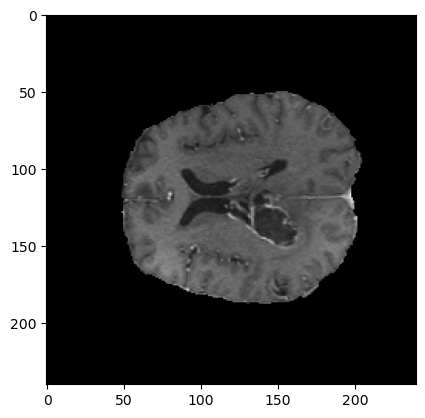

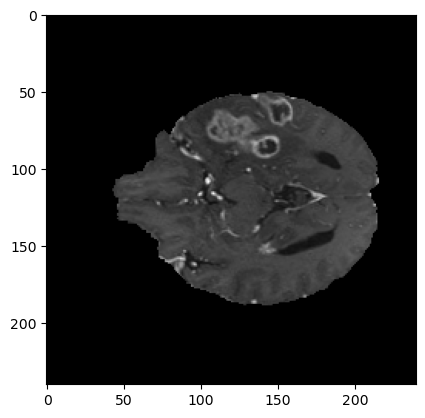

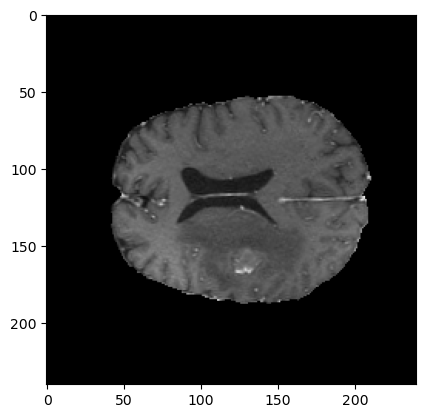

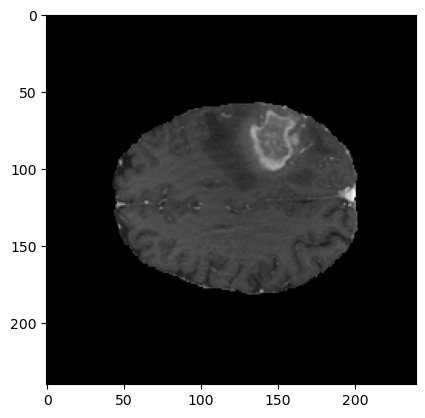

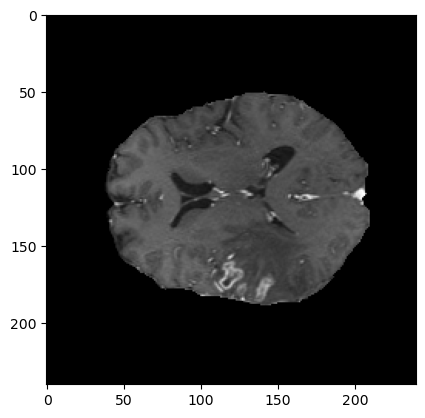

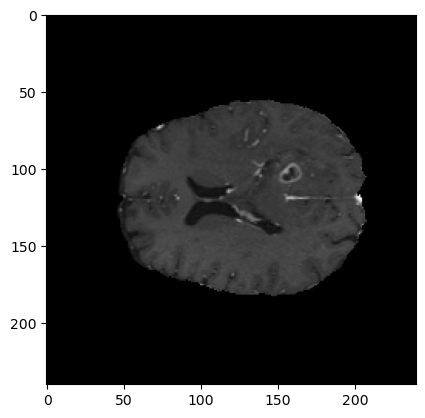

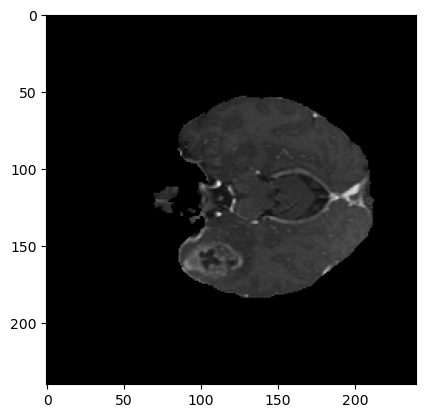

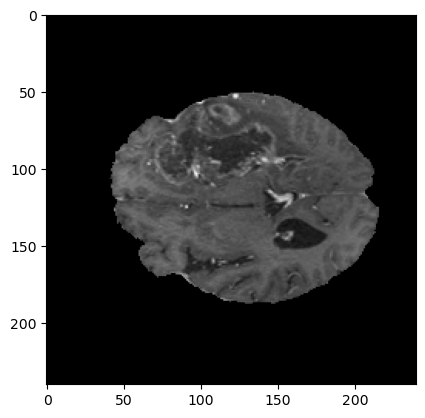

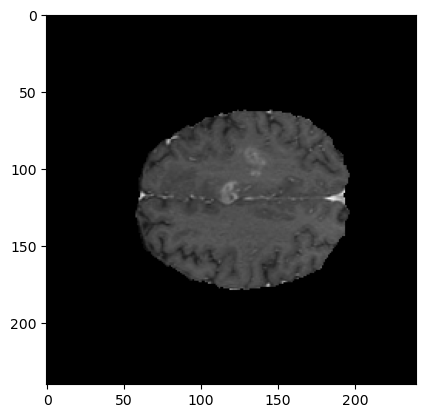

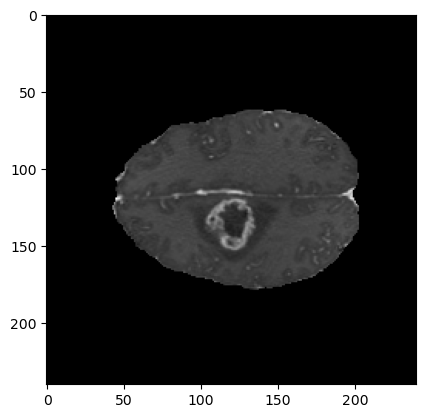

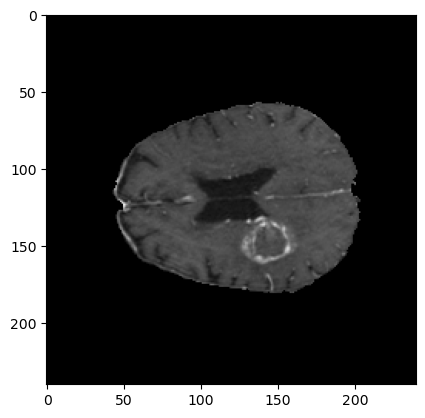

KeyboardInterrupt: 

In [9]:
import matplotlib.pyplot as plt
for image, mask in dataloader:
    plt.imshow(torch.squeeze(image).numpy(), cmap="gray")
    plt.show()